<a href="https://colab.research.google.com/github/manas16may/Bayesian-MCMC/blob/main/BayesianAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymc3==3.8

In [ ]:
pip install arviz

In [ ]:
import numpy as np
import pymc3 as pm
import arviz as az
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Question 1**
 Consider the first example we did in class where we wanted to find the probability p (for Heads) of a coin.
Reproduce what we discussed in class as follows:

(i) First construct a sampler with a known p value. You will use this to generate data for your Bayesian
analysis for different values of p.

(ii) Using the following 4 priors a) non-informative b) prior with a peak at p = 0.25 c) prior with a peak at
p = 0.5 and d) prior with peak at p = 0.75 and the likelihood (you can use the one which was discussed
in class) plot the posterior distribution as your generate data. In particular show plots for what happens
after 1, 2, 3, 4 data points and after 1K and 4K data points. You can use a β-distribution to create the
peaked priors.

(iii) Also, check what happens when you do the first 4 data items one-by-one versus after all four items are
available - whether you get the same posterior.

**ANSWER**

(i) Here we design a sampler to simulate random data from which the likelihood of Bayes formula will be calculated

In [ ]:
from scipy.stats import bernoulli
def  generator1(x,p1):
    data=bernoulli.rvs(p=p1,size=x)
    return(data)

(ii)a)Uninformed prior


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1744.19it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1615.93it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:05<00:00, 1539.34it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:08<00:00, 926.59it/s] 
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitt

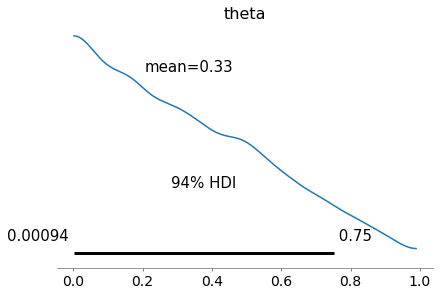

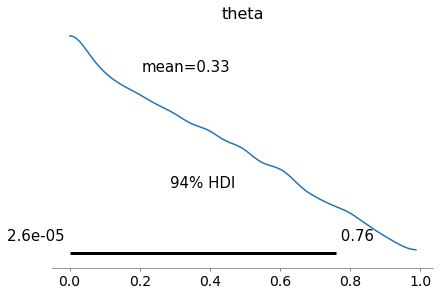

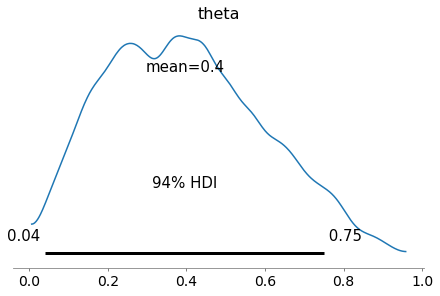

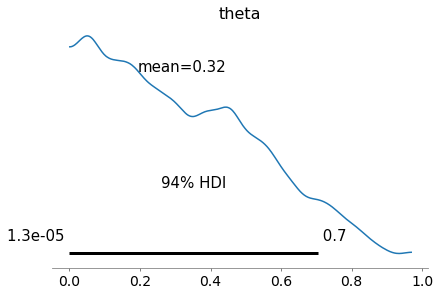

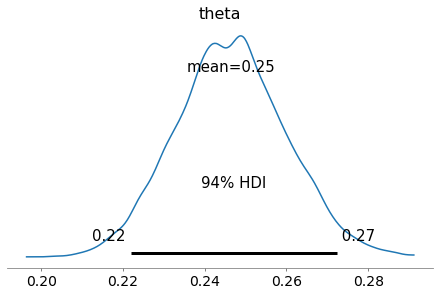

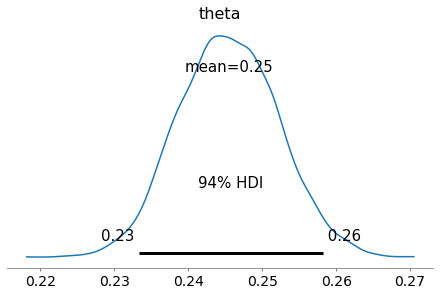

In [ ]:
n=[1,2,3,4,1000,4000]
for i in n:
  with pm.Model() as model:
    theta=pm.Beta('theta',1,1)   #prior dist of parameter theta
    data=pm.Bernoulli('data',theta,observed=generator1(i,.25))
    trace=pm.sample(4000,tune=4000)
    az.plot_posterior(trace)

(b)Prior peaked at 0.25

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1894.49it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1765.43it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1804.82it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1834.82it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sa

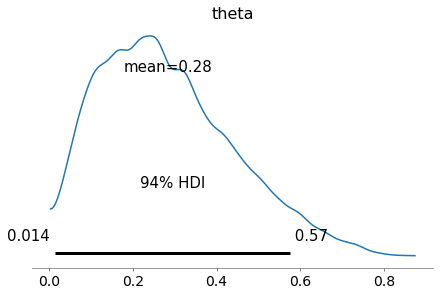

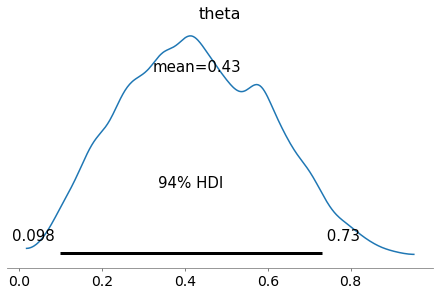

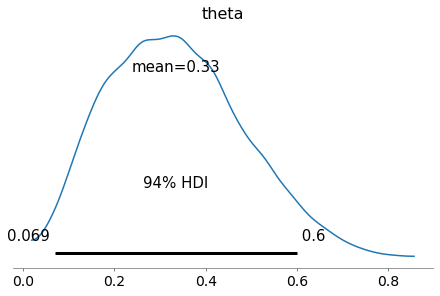

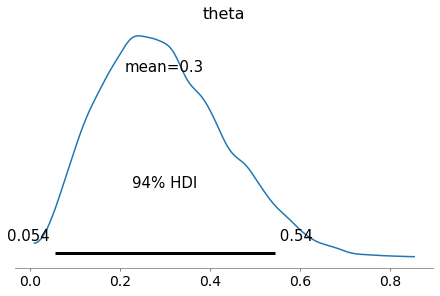

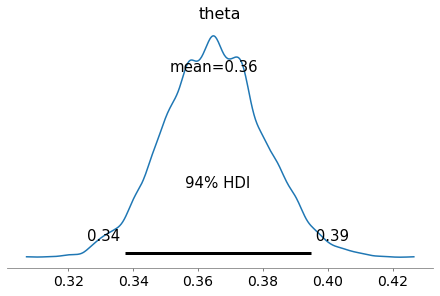

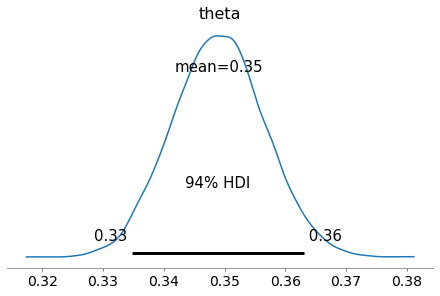

In [ ]:
for i in n:
    with pm.Model() as model:
        theta=pm.Beta('theta',2,4) #a=2,b=4 can be calculated from the  mode of beta distribution
        data=pm.Bernoulli('data',theta,observed=generator1(i,.35))
        trace=pm.sample(4000,random_seed=123,tune=4000)
        az.plot_posterior(trace)

(c)Prior peaked at 0.5

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1733.15it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1668.49it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:06<00:00, 1315.62it/s]
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1727.23it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitt

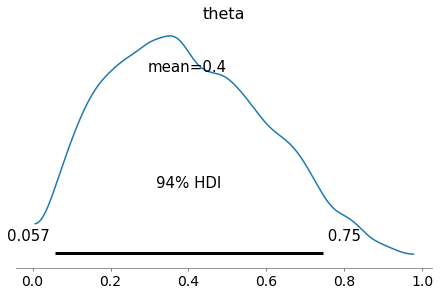

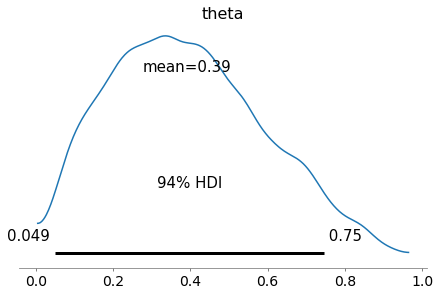

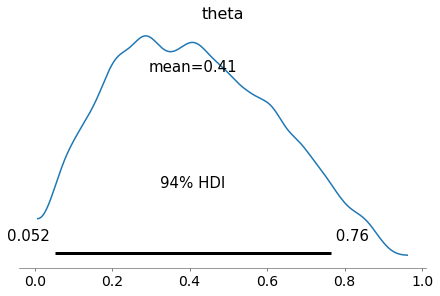

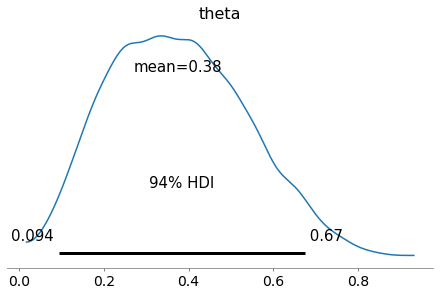

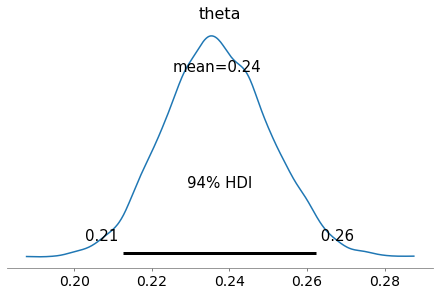

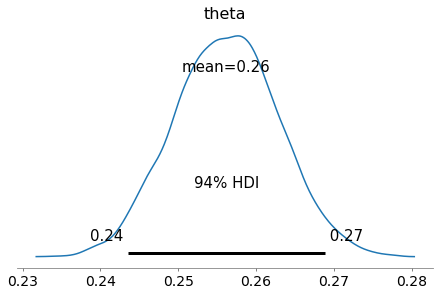

In [ ]:
for i in n:
    with pm.Model() as model:
        theta=pm.Beta('theta',2,2)
        data=pm.Bernoulli('data',theta,observed=generator1(i,.25))
        trace=pm.sample(4000,random_seed=123,tune=4000)
        az.plot_posterior(trace)

(iv) Prior peaked at 0.75

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1800.12it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1644.76it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:04<00:00, 1641.31it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 8000/8000 [00:13<00:00, 599.62it/s]
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitte

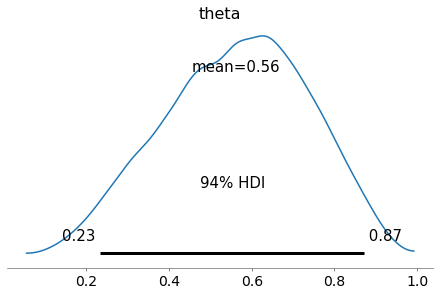

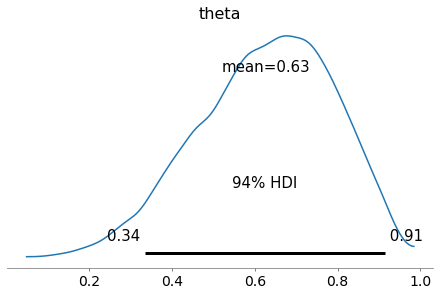

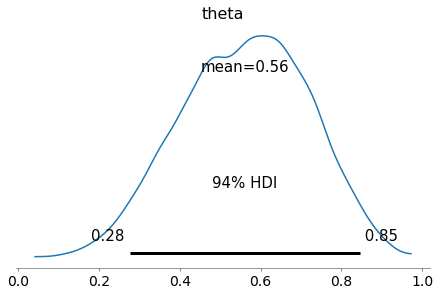

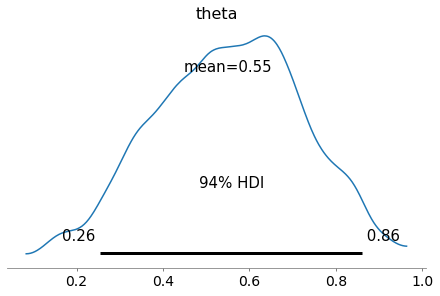

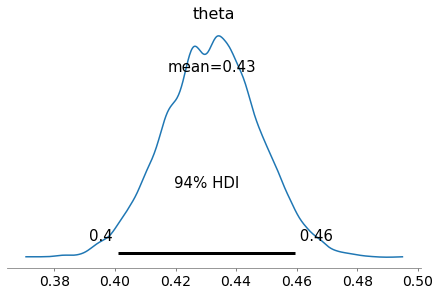

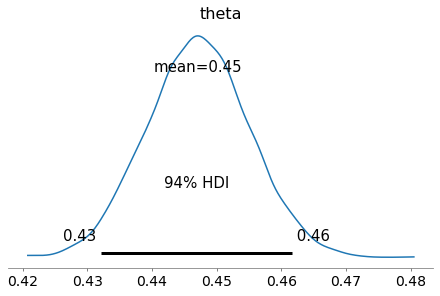

In [ ]:
for i in n:
  with pm.Model() as model:
    theta=pm.Beta('theta',4,2)
    data=pm.Bernoulli('data',theta,observed=generator1(i,.45))
    trace=pm.sample(4000,random_seed=123,tune=4000)
    az.plot_posterior(trace)

(iii)Checking if the data points are independent or not

array([0])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1814.43it/s]


array([1])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1858.53it/s]


array([0])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1849.10it/s]
The acceptance probability does not match the target. It is 0.8792935294793768, but should be close to 0.8. Try to increase the number of tuning steps.


[0, 1, 0, 1]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 7000/7000 [00:03<00:00, 1846.50it/s]


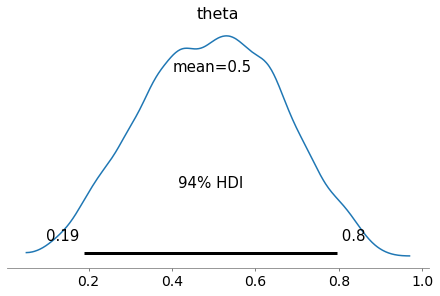

In [ ]:
#Updating priors after every toss i.e posterior of one throw becomes the prior a next throw
#The logic is based on analytical formula to solve such questions
d1=[]
with pm.Model() as model:
  theta=pm.Beta('theta',2,2)
  d=generator1(1,.45)
  display(d)
  d1.append(d[0])
  data=pm.Bernoulli('data',theta,observed=d)
  trace=pm.sample(2000,random_seed=123,tune=2000)
with pm.Model() as model:
  theta=pm.Beta('theta',2+d1[0],3-d1[0]) #using B(z+a,N-z+b)
  d=generator1(1,.45)
  display(d)
  d1.append(d[0])
  data=pm.Bernoulli('data',theta,observed=d)
  trace=pm.sample(2000,random_seed=123,tune=2000)
with pm.Model() as model:
  theta=pm.Beta('theta',2+d1[0]+d1[1],4-d1[0]-d1[1])   #using B(z+a,N-z+b)
  d=generator1(1,.45)
  display(d)
  d1.append(d[0])
  data=pm.Bernoulli('data',theta,observed=d)
  trace=pm.sample(2000,random_seed=123,tune=2000)
with pm.Model() as model:
  theta=pm.Beta('theta',2+d1[0]+d1[1]+d1[2],5-d1[0]-d1[1]-d1[2])  #using B(z+a,N-z+b)
  d=generator1(1,.45)
  d1.append(d[0])
  display(d1)
  data=pm.Bernoulli('data',theta,observed=d)
  trace=pm.sample(5000,random_seed=123,tune=2000)
  az.plot_posterior(trace)#to obtain sample from the final popterior distribution after 4 throws

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 4000/4000 [00:02<00:00, 1781.74it/s]


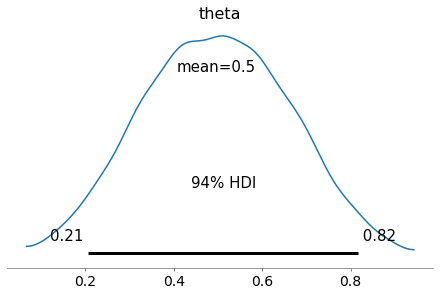

In [ ]:
#Posterior when all four data point are considered together
with pm.Model() as model:
  theta=pm.Beta('theta',2,2)
  data=pm.Bernoulli('data',theta,observed=d1)  #d1 is the data observed in the above segment but here we consider it as  generated in one go
  trace=pm.sample(2000,random_seed=123,tune=2000)
  az.plot_posterior(trace)

**Conclusion:**In the above part we see both the graph have almost same shape and the mean is exactly same so we can say that there is no significant
 difference in the posterior which also makes sense according to theory because the data points are independent 

**Question 2**
 Consider the height-weight correlation example. Build a Bayesian model for the correlation by finding posteriors for β0, β1, σ as follows:

(a) First create a data generator by assuming reasonable values for the three parameters β0, β1, σ. To generate
a data point w first draw a height value h ∼ N (µh, σh) (choose µh, σh suitably), then use the regression
equation to generate a predicted value, say ˆw, draw the sample data point using w ∼ N ( ˆw, σ).

(b) For two priors given below compute the posterior distributions for the three parameters for sample sizes
of 10, 100 and 1000 and plot the distribution and the 95% HDI.
The two priors are: i) a non-informative prior (done in class) and ii) a more informed prior created by
drawing 10 data points using the generator in part (a) and then using N (µ
0,σ0) as the prior where µ0,σ0
are the sample mean and sample standard deviation of the ten-sized sample.

**(i)**Sampler for generating synthetic data which will be otherwise availble in real world situations

In [ ]:
def generator(n):
  b0=90  #all three values are based on various datasets available online
  b1=2
  sigma=5
  ht=np.empty(n)
  wt=np.empty(n)
  for i in range(n):
    ht[i]=np.random.normal(68,10,1)#data points for height
    hat=b0+b1*ht[i]
    wt[i]=np.random.normal(hat,sigma,1)#data points for weight
  return(ht,wt)

(ii) Part a with uninformed prior.All the three cases are shown separately but it could have done using a for loop as done in the case of informed priors


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 2 divergences: 100%|██████████| 10000/10000 [00:34<00:00, 290.73it/s]
There were 29 divergences after tuning. Increase `target_accept` or reparameterize.
There were 31 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


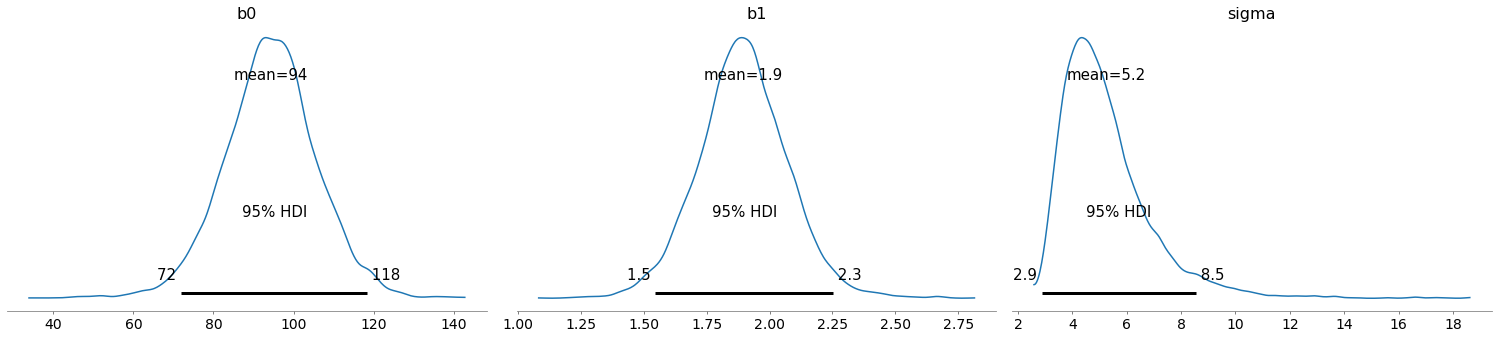

In [ ]:
ht,wt=generator(10) #sample size of 10
with pm.Model() as model:
   b0=pm.Uniform('b0',-150,150)  #centered at zero with a wide range
   b1=pm.Uniform('b1',-10,10)
   sigma=pm.Uniform('sigma',0,100)
   predw=pm.Normal('predw',mu=b0+b1*ht,sd=sigma,observed=wt)
   trace1=pm.sample(5000,tune=5000)
   az.plot_posterior(trace1,hdi_prob=.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 10000/10000 [00:33<00:00, 298.62it/s]


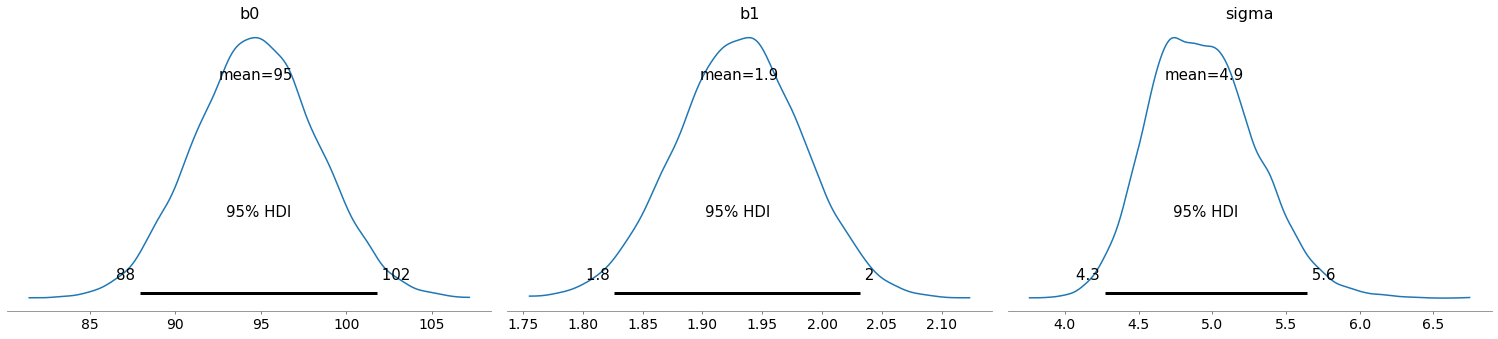

In [ ]:
ht,wt=generator(100) #sample size of 100
with pm.Model() as model:
   b0=pm.Uniform('b0',-150,150)
   b1=pm.Uniform('b1',-10,10)
   sigma=pm.Uniform('sigma',0,100)
   predw=pm.Normal('predw',mu=b0+b1*ht,sd=sigma,observed=wt)
   trace1=pm.sample(5000,tune=5000)
   az.plot_posterior(trace1,hdi_prob=.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 0 divergences: 100%|██████████| 10000/10000 [00:37<00:00, 267.87it/s]
The acceptance probability does not match the target. It is 0.7173996787301358, but should be close to 0.8. Try to increase the number of tuning steps.


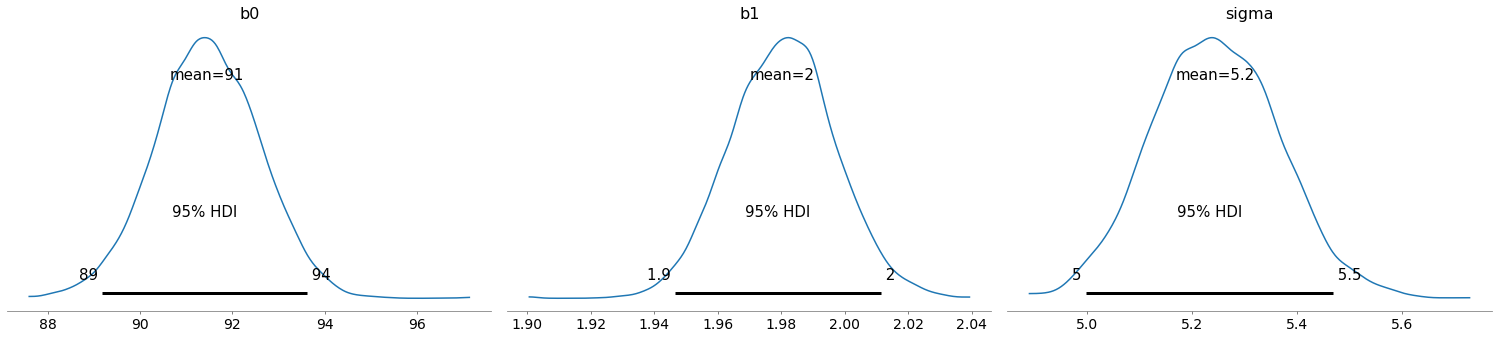

In [ ]:
ht,wt=generator(1000) #sample size of 1000
with pm.Model() as model:
   b0=pm.Uniform('b0',-150,150)
   b1=pm.Uniform('b1',-10,10)
   sigma=pm.Uniform('sigma',0,100)
   predw=pm.Normal('predw',mu=b0+b1*ht,sd=sigma,observed=wt)
   trace1=pm.sample(5000,tune=5000)
   az.plot_posterior(trace1,hdi_prob=.95)

b)Informed prior

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 1 divergences: 100%|██████████| 10000/10000 [00:39<00:00, 253.00it/s]
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6891837274598441, but should be close to 0.8. Try to increase the number of tuning steps.
There were 55 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, b1, b0]
Sampling chain 1, 1 divergences: 100%|██████████| 10000/10000 [00:28<00:00, 350.45it/s]
The acceptance probability does not match the target. It is 0.885473452834802, but should be close to 0.8. Try to increase the number of tuning steps.
Ther

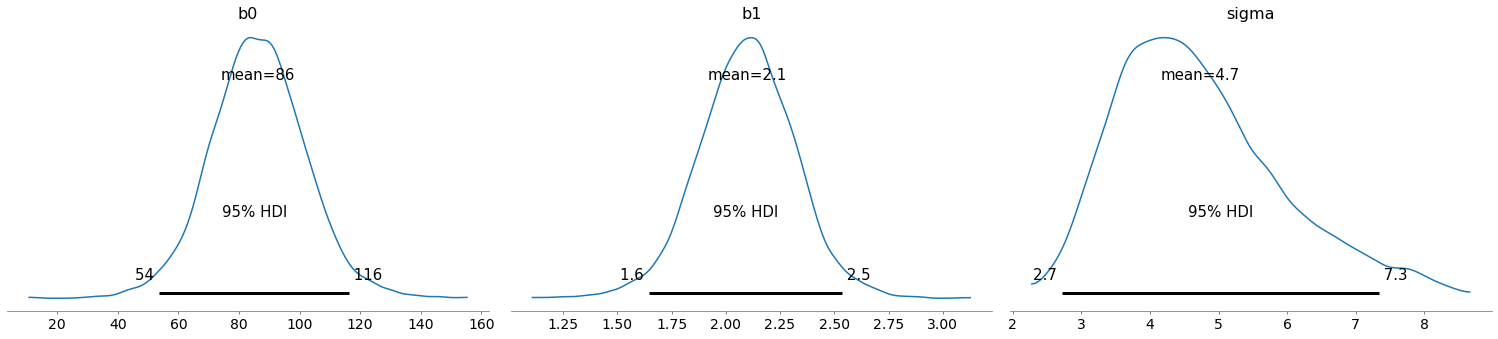

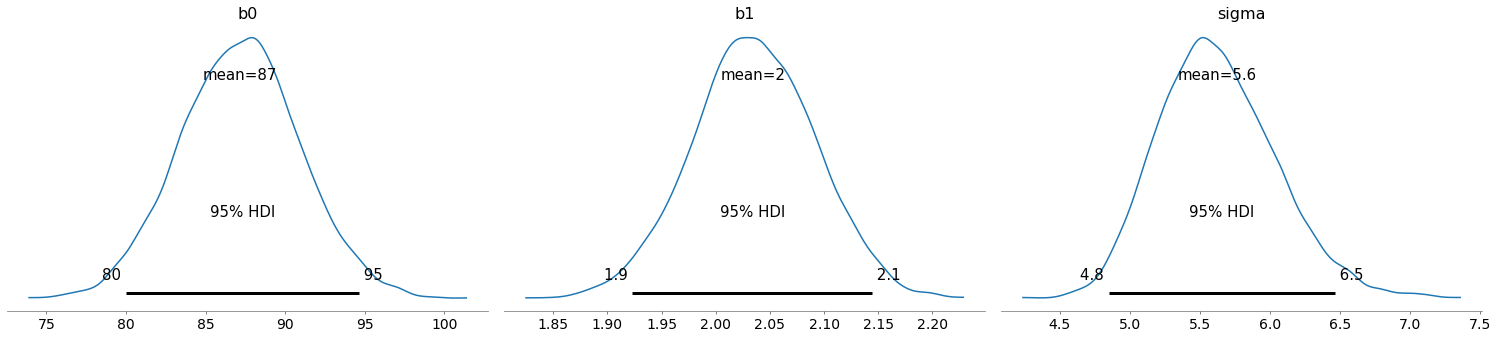

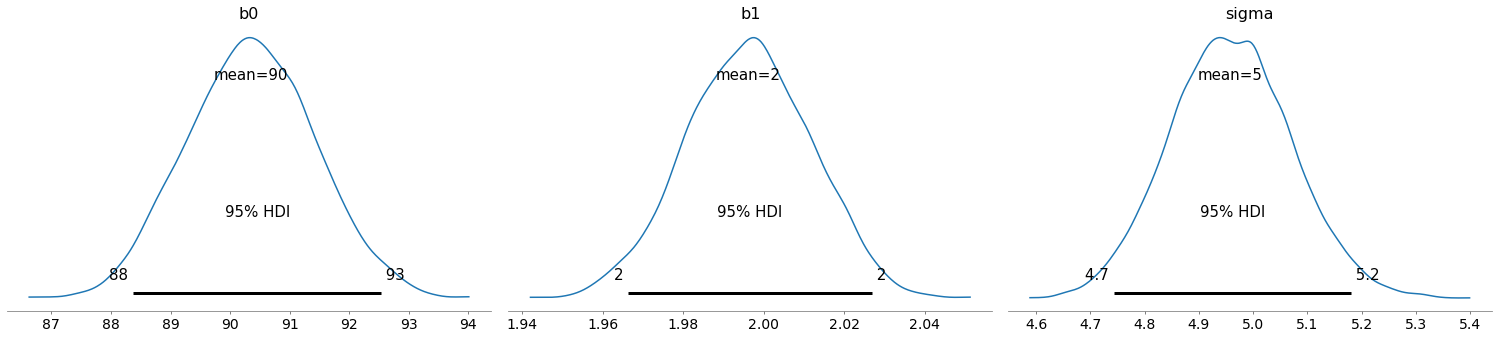

In [ ]:
def result(n,ht,wt,b0,b1,rmse):
  with pm.Model() as model:
   b0=pm.Normal('b0',b0,100)    #prior dist of intercept coefficient
   b1=pm.Normal('b1',b1,100)    #prior dist of slope coefficient
   sigma=pm.Uniform('sigma',mse-5,mse+5)     #prior dist of varaince of weights
   predw=pm.Normal('predw',mu=b0+b1*ht,sd=sigma,observed=wt)    
   trace1=pm.sample(5000,tune=5000)
   az.plot_posterior(trace1,hdi_prob=.95)
import pandas as pd
n=[10,100,1000]
for i in n:
  ht,wt=generator(i)
  d11=pd.DataFrame((ht,wt)).transpose()
  d11.columns=['ht','wt']
  dep=d11['wt']
  indep=sm.add_constant(d11['ht'])
  mod=sm.OLS(dep,indep) #to run OLS regression on 10 sample data points to obtain a intuition about regression coefficients
  res=mod.fit()
  wt1=res.predict()
  b0=res.params[0]  #intercept coefficient
  b1=res.params[1]  #slope coefficient
  rmse=sm.tools.eval_measures.rmse(wt.reshape(-1,1),wt1.reshape(-1,1))  #estimate of varaince of weights 
  result(n,ht,wt,b0,b1,rmse[0])